In [1]:
# checking python version
from platform import python_version
print(python_version())

3.9.7


### Data Analysis Plan
- hypotheses 
    - Testing the hypothesis that household income has no effect on levels of bias crime
    - Testing the hypothesis that urbanisation has a significant effect on levels of bias crimes
- dataset(s) 
    - shared_data.csv
    - crimes.csv
- inclusion/exclusion criteria 
    - the whole dataset will be used
    - ...
- variables to be used in the main analysis, 
    - avg_biascrimes_per_100k
    - median_household_income
    - share_population_in_metro_areas
- plan on what to do with missing data, 
    - drop every row (axis=0) which has "any" Null value in it.
- key tables and summary statistics (univariable, bivariable, and grouping variables), 
- suitable graphs to include, and, 
    - boxplots
    - scatter plots (regplot)
- statistical methods and software to be used.
    - Pandas, Matplotlib, and Seaborn libraries ..
    - Pearson’s Correlation Coefficient
    - Log transformation
    - ...

### Reading CSV data from two files and merge them into a single df

In [2]:
# import packages
import pandas as pd # for data analysis
import numpy as np # for mathematical and logical operations

import seaborn as sns # for Data visualization
import matplotlib.pyplot as plt # for Data visualization
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

from scipy.stats import pearsonr

In [3]:
# load datasets
df_t2a = pd.read_csv("datasets/shared_data.csv")
df_t2b = pd.read_csv("datasets/crimes.csv")

# merge loaded dataframe using merge() function
df_merged = df_t2a.merge(df_t2b)

# check the updated rows and columns count of the merged dataframe
df_merged.shape

(51, 11)

In [4]:
df_merged.head(5)

,region,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_to_the_right,avg_biascrimes_per_100k
0,1,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,1.806410
1,2,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,1.656700
2,3,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,3.413928
3,4,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.869209
4,5,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,2.397986


In [5]:
# checking % of missing values in columns
def check_missing_values(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

### Cleaning the merged data

In [6]:
check_missing_values(df_merged)

region - 0%
median_household_income - 0%
share_unemployed_seasonal - 0%
share_population_in_metro_areas - 0%
share_population_with_high_school_degree - 0%
share_non_citizen - 6%
share_white_poverty - 0%
gini_index - 0%
share_non_white - 0%
share_voters_voted_to_the_right - 0%
avg_biascrimes_per_100k - 2%


In [7]:
# then, drop every row (axis=0) which has "any" Null value in it.
dropped_df = df_merged.dropna(axis = 0, how = 'any')
# alternative - missing value imputation ??

# remove an unnecessary column
if "share_voters_voted_to_the_right" in dropped_df:
    dropped_df = dropped_df.drop('share_voters_voted_to_the_right', axis=1)

In [8]:
check_missing_values(dropped_df)
    
# check the updated rows and columns count of the dropped dataframe
dropped_df.shape

region - 0%
median_household_income - 0%
share_unemployed_seasonal - 0%
share_population_in_metro_areas - 0%
share_population_with_high_school_degree - 0%
share_non_citizen - 6%
share_white_poverty - 0%
gini_index - 0%
share_non_white - 0%
share_voters_voted_to_the_right - 0%
avg_biascrimes_per_100k - 2%


(47, 10)

In [9]:
dropped_df.skew()

region                                     -0.029409
median_household_income                     0.298552
share_unemployed_seasonal                  -0.012287
share_population_in_metro_areas            -0.841545
share_population_with_high_school_degree   -0.290555
share_non_citizen                           0.647971
share_white_poverty                         0.682062
gini_index                                  0.969180
share_non_white                             0.405428
avg_biascrimes_per_100k                     2.682438
dtype: float64

Skewness values for all variables are between -0.84 and 2.6. Skewed to the right. There might be outliers in avg_biascrimes_per_100k variable. 

In [10]:
dropped_df.describe()

,region,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,avg_biascrimes_per_100k
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,26.106383,55423.340426,0.050085,0.765957,0.868426,0.054043,0.090851,0.454511,0.310426,2.379352
std,15.151746,8817.840427,0.010523,0.177233,0.033165,0.031184,0.024122,0.021235,0.149389,1.744572
min,1.000000,39552.000000,0.028000,0.310000,0.799000,0.010000,0.040000,0.419000,0.060000,0.266941
25%,13.500000,48657.000000,0.042500,0.640000,0.840500,0.030000,0.075000,0.440000,0.200000,1.303706
50%,27.000000,55173.000000,0.051000,0.800000,0.874000,0.040000,0.090000,0.455000,0.280000,1.937083
75%,38.500000,60719.000000,0.057500,0.900000,0.897000,0.080000,0.100000,0.466500,0.420000,3.168247
max,51.000000,76165.000000,0.073000,1.000000,0.918000,0.130000,0.170000,0.532000,0.630000,10.953480


### Notes
This dataset is small, so take the whole dataset for furture analysis. \
For larger datasets, we could consider to extract the samples from the whole populations using Bootstrapping, sampling methods. 

### Investigating the effects of household income on levels of bias crimes

<AxesSubplot:xlabel='avg_biascrimes_per_100k'>

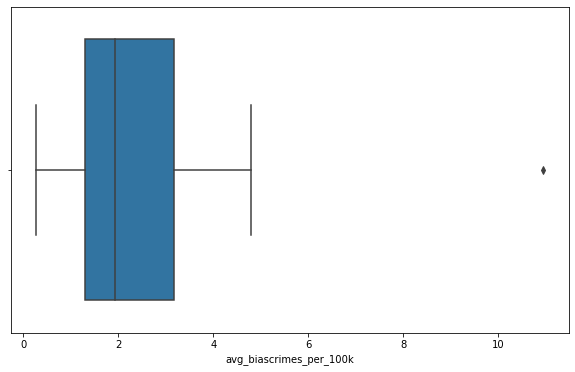

In [11]:
# detecting outliers on levels of bias crimes
sns.boxplot(x = dropped_df['avg_biascrimes_per_100k'])

#### The correlation between two quantitative variables graphically
- dependent variable: avg_biascrimes_per_100k
- independent variable(s): median_household_income

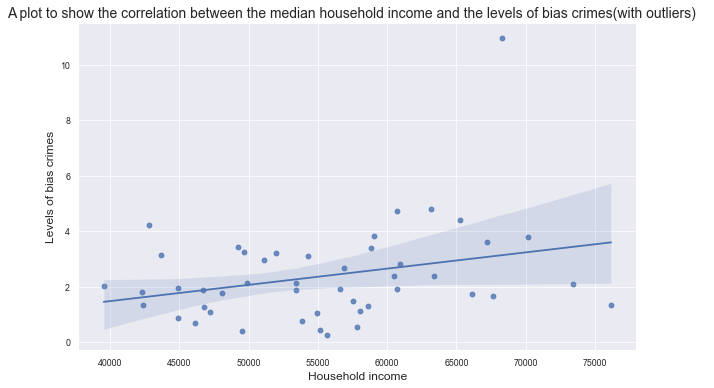


# Interpretation of the plot (with outliers)
The regression line is going up to the right slightly. The data points are scattered near the regression line(with one outlier where the levels of crime is greater than 10) with a slight positive pattern. 
According to the data trend, the two variables might depend on each other positively which means the household incomes might have *some effects* on the levels of crimes but probably not strongly. 



 ##Alternative approach (without outliers)


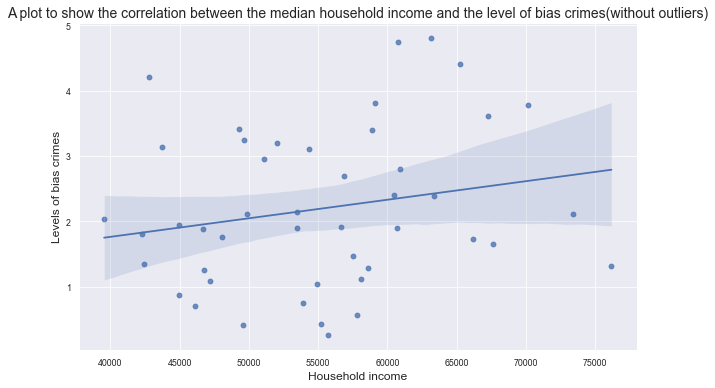

In [12]:
# seaborn’s regplot(), with outlier data points
# alternative - lmplot()[combines regplot() and FacetGrid]
sns.set_theme(color_codes = True)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})  
sns.regplot(x = 'median_household_income',
           y = 'avg_biascrimes_per_100k',
           data = dropped_df)
plt.title('A plot to show the correlation between the median household income and the levels of bias crimes(with outliers)   ')
plt.xlabel('Household income')
plt.ylabel('Levels of bias crimes')

# show the plot
plt.show()

print("""
# Interpretation of the plot (with outliers)
The regression line is going up to the right slightly. The data points are scattered near the regression line(with one outlier where the levels of crime is greater than 10) with a slight positive pattern. 
According to the data trend, the two variables might depend on each other positively which means the household incomes might have *some effects* on the levels of crimes but probably not strongly. 
""")

##############################################################################
print("\n\n ##Alternative approach (without outliers)")

# obviously, there is one outlier data point where level of crime is greater than 10, so removed it 
without_outlier_df = dropped_df[dropped_df['avg_biascrimes_per_100k'] < 10]
#without_outlier_df.shape # (46, 10)

# seaborn’s regplot(), without outliers
sns.set_theme(color_codes = True)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})   
sns.regplot(x = 'median_household_income', 
           y = 'avg_biascrimes_per_100k',
           data = without_outlier_df)
plt.title('A plot to show the correlation between the median household income and the level of bias crimes(without outliers)')
plt.xlabel('Household income')
plt.ylabel('Levels of bias crimes')

# show the plot
plt.show()

### Test the hypothesis that household income has no effect on levels of bias crime

Setting the Hypothesis as follows:

**H0**(NULL Hypothesis) - household income has **no effect** on levels of bias crime (the two variables are independent) \
**H1**(Alternative Hypothesis) - household income has effect on levels of bias crime (there is a dependency between the variables)

alpha - 0.05 (95% confidence interval)

<i>Reject or Accept the NULL hopothesis ?

In [13]:
# Pearson’s Correlation Coefficient between two variables (with outliers)
corr, p = pearsonr(dropped_df['median_household_income'], dropped_df['avg_biascrimes_per_100k'])
print('Pearsons correlation: %.3f' % corr)
print('p-value: %.3f' % (p))

# Hypothesis Testing (with outliers) 
if p > 0.05:
    print('Probably independent(no effect)')
else:
    print('Probably dependent(has effect)')
    
print("""
#Interpretation of the result (with outliers)
Based on the calculated result, the correlation coefficient value is around 0.3 which indicates that there is a weak positive relationship between household income and levels of bias crimes.  To know in more detail that these two variables are significantly correlated with each other, we can check their p-values which can be calculated through pearsonr() library. \nWhen p-value > 0.05, we accept H0(NULL Hypothesis).  Otherwise, we will accept H1(Alternative Hypothesis). \n
Now the calculated p-value is 0.044 which is less than 0.05(alpha), therefore we will reject Null Hypothesis and accept an alternative hypothesis which says "Probably dependent(has effect)" which means the household income has effect on levels of bias crimes.
""")

##############################################################################   
print("\n\n##Alternative approach (without outliers)")

# Pearson’s Correlation Coefficient between two variables (without outliers)
corr, p = pearsonr(without_outlier_df['median_household_income'], without_outlier_df['avg_biascrimes_per_100k'])
print('Pearsons correlation: %.3f' % corr)
print('p-value: %.3f' % (p))

# Hypothesis Testing (without outliers)
if p > 0.05:
    print('Probably independent(no effect)')
else:
    print('Probably dependent(has effect)')
    
print("""
It means household income has no effect on levels of bias crimes.
""")

Pearsons correlation: 0.296
p-value: 0.044
Probably dependent(has effect)

#Interpretation of the result (with outliers)
Based on the calculated result, the correlation coefficient value is around 0.3 which indicates that there is a weak positive relationship between household income and levels of bias crimes.  To know in more detail that these two variables are significantly correlated with each other, we can check their p-values which can be calculated through pearsonr() library. 
When p-value > 0.05, we accept H0(NULL Hypothesis).  Otherwise, we will accept H1(Alternative Hypothesis). 

Now the calculated p-value is 0.044 which is less than 0.05(alpha), therefore we will reject Null Hypothesis and accept an alternative hypothesis which says "Probably dependent(has effect)" which means the household income has effect on levels of bias crimes.



##Alternative approach (without outliers)
Pearsons correlation: 0.206
p-value: 0.170
Probably independent(no effect)

It means household inc

### Investigating the effects of urbanisation on levels of bias crimes

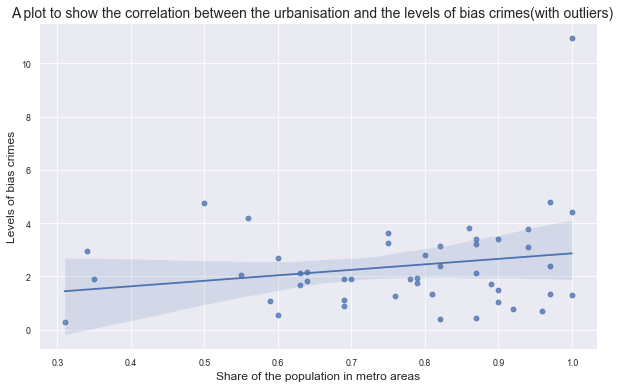


#Interpretation of the plot (with outliers)
The data points are scattered near the regression line(with one outlier where the levels of crime is greater than 10) with no pattern.
According to the data trend, the two variables might not depend on each other which means the urbanisation might not have a significant effect on levels of crimes.



 ##Alternative approach (without outliers)


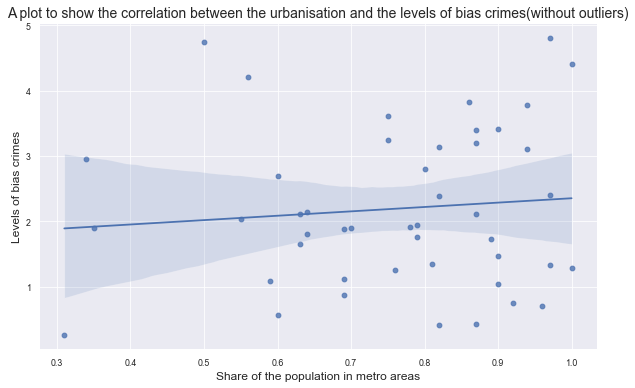

In [14]:
# investigating the correlation between two quantitative variables graphically
# seaborn’s regplot(), with outlier data points
sns.set_theme(color_codes = True)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})  
sns.regplot(x = 'share_population_in_metro_areas', 
           y = 'avg_biascrimes_per_100k',
           data = dropped_df)
plt.title('A plot to show the correlation between the urbanisation and the levels of bias crimes(with outliers)   ')
plt.xlabel('Share of the population in metro areas')
plt.ylabel('Levels of bias crimes')

# show the plot
plt.show()

print("""
#Interpretation of the plot (with outliers)
The data points are scattered near the regression line(with one outlier where the levels of crime is greater than 10) with no pattern.
According to the data trend, the two variables might not depend on each other which means the urbanisation might not have a significant effect on levels of crimes.
""")

##############################################################################
print("\n\n ##Alternative approach (without outliers)")

# seaborn’s regplot(), without outliers
sns.set_theme(color_codes = True)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})   
sns.regplot(x = 'share_population_in_metro_areas', 
           y = 'avg_biascrimes_per_100k',
           data = without_outlier_df)
plt.title('A plot to show the correlation between the urbanisation and the levels of bias crimes(without outliers)')
plt.xlabel('Share of the population in metro areas')
plt.ylabel('Levels of bias crimes')

# show the plot
plt.show()

### Testing the hypothesis that urbanisation has a significant effect on levels of bias crimes

Setting the Hypothesis as follows:

**H0**(NULL Hypothesis) - urbanisation has **no effect** on levels of bias crime (the two variables are independent)
**H1**(Alternative Hypothesis) - urbanisation has effect on levels of bias crime (there is a dependency between the variables)

alpha - 0.05 (95% confidence interval)

<i> Reject or Accept the NULL hopothesis ?

In [15]:
# Pearson’s Correlation Coefficient between two variables (with outliers)
corr, p = pearsonr(dropped_df['share_population_in_metro_areas'], dropped_df['avg_biascrimes_per_100k'])
print('Pearsons correlation: %.3f' % corr)
print('p-value: %.3f' % (p))

# Hypothesis Testing (with outliers) 
if p > 0.05:
    print('Probably independent(no effect)')
else:
    print('Probably dependent(has effect)')
    
print("""
#Interpretation of the result (with outliers)
Based on the calculated result, the correlation coefficient value is around 0.2 which indicates that there might be a weak positive relationship between urbanisation and levels of bias crimes.  To know in more detail that these two variables are significantly correlated with each other, we can check their p-values which could be calculated through pearsonr() library.   \nWhen p-value > 0.05, we accept H0(NULL Hypothesis).  Otherwise, we will accept H1(Alternative Hypothesis). \n
Now the calculated p-value is 0.158 which is greater than 0.05, therefore we will accept the Null Hypothesis which says "Probably independent(no effect)" which means the urbanisation has no effect on levels of bias crimes.
""")

##############################################################################   
print("\n\n##Alternative approach (without outliers)")
# Pearson’s Correlation Coefficient between two variables (without outliers)
corr, p = pearsonr(without_outlier_df['share_population_in_metro_areas'], without_outlier_df['avg_biascrimes_per_100k'])
print('Pearsons correlation: %.3f' % corr)
print('p-value: %.3f' % (p))

# Hypothesis Testing (without outliers)
if p > 0.05:
    print('Probably independent(no effect)')
else:
    print('Probably dependent(has effect)')
    
print("""
It means urbanisation has no effect on the levels of bias crimes.
""")

Pearsons correlation: 0.209
p-value: 0.158
Probably independent(no effect)

#Interpretation of the result (with outliers)
Based on the calculated result, the correlation coefficient value is around 0.2 which indicates that there might be a weak positive relationship between urbanisation and levels of bias crimes.  To know in more detail that these two variables are significantly correlated with each other, we can check their p-values which could be calculated through pearsonr() library.   
When p-value > 0.05, we accept H0(NULL Hypothesis).  Otherwise, we will accept H1(Alternative Hypothesis). 

Now the calculated p-value is 0.158 which is greater than 0.05, therefore we will accept the Null Hypothesis which says "Probably independent(no effect)" which means the urbanisation has no effect on levels of bias crimes.



##Alternative approach (without outliers)
Pearsons correlation: 0.098
p-value: 0.518
Probably independent(no effect)

It means urbanisation has no effect on the levels of

### Some insights 
Scenario I (at 95% confidence interval) \
<i>Household income has no effect on levels of bias crime 
- with outliers (False)
- without outliers (True)

Scenario II (at 95% confidence interval) \
<i>Urbanisation has a significant effect on levels of bias crimes
- with outliers (False)
- without outliers (False)

Outliers can affect the outcome of an analysis. There are two types of outliers called **univariate and multivariate**.  Among them, I analyzed the dataset with univariate outliers which are extreme values in the distribution of a specific variable.   <i>For example, a univariate outlier could be a human age measurement of 120 years.  

There are two steps in analyzing the outliers,  
- Analyzing
    - detect
    - remove (removing the outliers could lose the data and which can affect some further data analysis)
    - analyse again

- Handling
    - Log transformation on the variable which have outliers (workaround ?)
    - ...

Text(0.5, 1.0, 'Log-Transformed Bias Crimes')

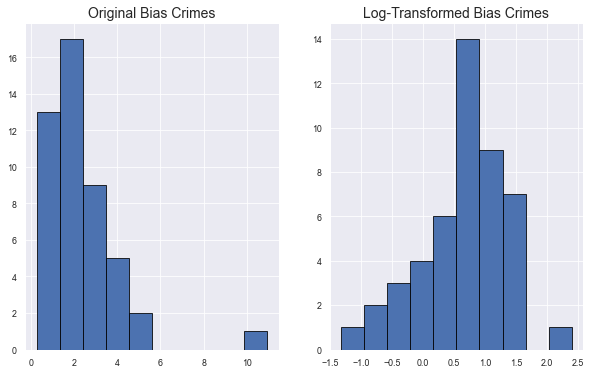

In [16]:
#create log-transformed data
dropped_df['log_avg_biascrimes_per_100k'] = np.log(dropped_df['avg_biascrimes_per_100k'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dropped_df['avg_biascrimes_per_100k'], edgecolor='black')
# axs[1].hist(without_outlier_df['avg_biascrimes_per_100k'], edgecolor='black')
axs[1].hist(dropped_df['log_avg_biascrimes_per_100k'], edgecolor='black')


#add title to each histogram
axs[0].set_title('Original Bias Crimes')
# axs[1].set_title('Original Bias Crimes (without outliers)')
axs[1].set_title('Log-Transformed Bias Crimes')

Data analysis after log transformation ???

to be continued ......

In [17]:
# the summary of the regression
import statsmodels.api as sm
reg2 = sm.OLS(dropped_df["avg_biascrimes_per_100k"], sm.add_constant(
    dropped_df[['median_household_income',
                'share_unemployed_seasonal',
                'share_population_in_metro_areas',
                'share_population_with_high_school_degree',
                'share_non_citizen',
                'share_white_poverty',
                'gini_index',
                'share_non_white'
               ]])).fit()
print(reg2.summary())

                               OLS Regression Results                              
Dep. Variable:     avg_biascrimes_per_100k   R-squared:                       0.493
Model:                                 OLS   Adj. R-squared:                  0.386
Method:                      Least Squares   F-statistic:                     4.611
Date:                     Tue, 10 Jan 2023   Prob (F-statistic):           0.000544
Time:                             04:08:38   Log-Likelihood:                -76.398
No. Observations:                       47   AIC:                             170.8
Df Residuals:                           38   BIC:                             187.4
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

Continue Dimension reduction (eg; PCA) >> 